In [54]:
import numpy as np



# 使用示例
n = 6
parts = 3

for _ in range(5):  # 生成5个例子
    result = random_partition_positive(n, parts)
    print(f"{'+'.join(map(str, result))} = {n}")

4+1+1 = 6
3+2+1 = 6
3+1+2 = 6
3+1+2 = 6
2+3+1 = 6


离散化FBM的考虑
如何编码每个数字？
- 给定一个范围，每个范围都设置一个数字，好处是容易扩充词表，坏处是数字之间的联系学起来费力
- bin_count+index，bin_count，表示范围，比如4个 bin就是位于0~0.25, 0.25~0.5, 0.5~0.75, 0.75~1；考虑层级
- 0~9直接对应过来，使用 <s>，考虑使用多套0~9
对 FBM 平移，拉伸，

给定 num_token，得到 num_sequence，覆盖 num_vocab


1，2：
给定一个 range，将 range 随机划分成 N 块区间（设置是否有重叠）
独有规律：每个区间分配 S 个 FBM，将 FBM 拉伸到该区间 
共享规律：将区间分成 P 组，每组的 N / P 区间共享 T 个 FBM，这 T 个 FBM 都复制
share_ratio：独有和共享的比例，对于独有只能设置N或者S；共享只能设置 P 或者 T
第一种，不加空格，FBM sample 数为 num_sequence；加的话 num_sequence / 2
第二种：

第一种情况：
如果不重叠，每个区间是 num_vocab / N 的大小
独有规律的 num_sequence = S * N
共享规律 N / P * T
3：
一套系统包括数字和范围，每套系统独有一些 FBM，也有一些 FBM 在不同系统之间共享

In [97]:
import numpy as np
from scipy.special import softmax

class LogLinearLanguageModel:
    def __init__(self, vocab_size, vector_dim=10):
        self.vocab_size = vocab_size
        self.vector_dim = vector_dim
        self.word_vectors = np.random.normal(0, 1, (vocab_size, vector_dim))

    def generate_discourse_vector(self):
        return np.random.normal(0, 1, self.vector_dim)

    def generate_sentence(self, length):
        discourse_vector = self.generate_discourse_vector()
        sentence = []
        for _ in range(length):
            token_probs = softmax(np.dot(self.word_vectors, discourse_vector))
            token = np.random.choice(self.vocab_size, p=token_probs)
            sentence.append(token)
        return sentence

# 使用示例
vocab_size = 1000
model = LogLinearLanguageModel(vocab_size)

# 生成一个长度为10的句子
sentence = model.generate_sentence(10)
print("生成的句子（词索引）:", sentence)

# 如果我们有一个词汇表，我们可以将索引转换为实际的词
# 这里我们只是用索引来表示
vocab = [f"word_{i}" for i in range(vocab_size)]
sentence_words = [vocab[i] for i in sentence]
print("生成的句子（词）:", sentence_words)

生成的句子（词索引）: [693, 398, 653, 519, 667, 955, 398, 667, 885, 667]
生成的句子（词）: ['word_693', 'word_398', 'word_653', 'word_519', 'word_667', 'word_955', 'word_398', 'word_667', 'word_885', 'word_667']


In [10]:
import numpy as np


def get_parts(n, parts):
        if parts <= 0:
            raise ValueError("Number of parts must be positive")
        if n < parts:
            raise ValueError("Sum must be at least equal to the number of parts")

        # 首先分配每部分至少1
        result = [1] * parts
        remaining = n - parts

        # 随机分配剩余的值
        for _ in range(remaining):
            index = np.random.randint(0, parts)
            result[index] += 1

        return result
    
    
get_parts(25000, 4)

[6177, 6277, 6282, 6264]

区间元组:
区间 1: (0, 26)
区间 2: (26, 53)
区间 3: (53, 82)
区间 4: (82, 91)
区间 5: (91, 100)


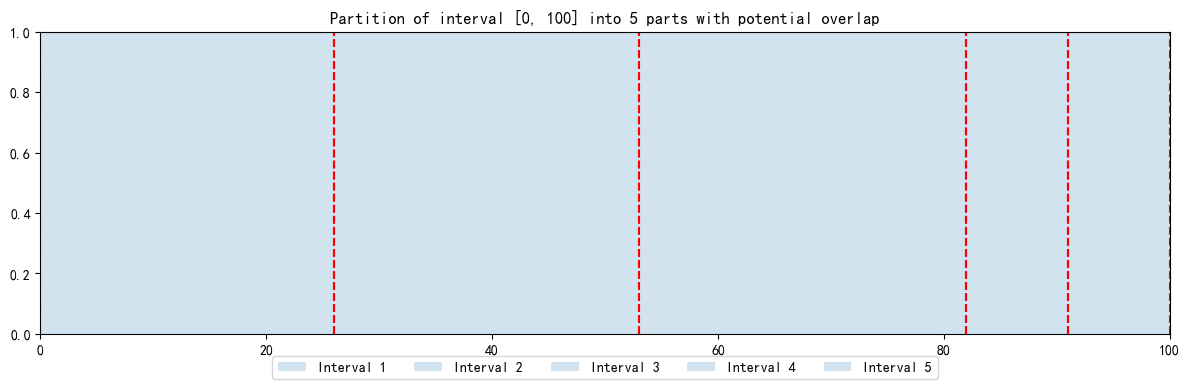

In [92]:
import numpy as np
import matplotlib.pyplot as plt




# 设置参数
N = 5
alpha = 1
min_length = 10
overlap_prob = 0.5
max_overlap_ratio = 0.3
interval_start = 0
interval_end = 100

partition_points = dirichlet_partition_with_overlap(
    N, alpha, min_length, overlap_prob, max_overlap_ratio, interval_start, interval_end
)
interval_tuples = get_interval_tuples(partition_points)

print("区间元组:")
for i, interval in enumerate(interval_tuples, 1):
    print(f"区间 {i}: {interval}")

# 可视化
plt.figure(figsize=(12, 4))
for i, (start, end) in enumerate(interval_tuples):
    plt.axvline(x=start, color="r", linestyle="--")
    plt.axvline(x=end, color="r", linestyle="--")
    plt.axvspan(start, end, alpha=0.2, label=f"Interval {i+1}")
plt.xlim(interval_start, interval_end)
plt.title(
    f"Partition of interval [{interval_start}, {interval_end}] into {N} parts with potential overlap"
)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=N)
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
from scipy.special import softmax

class LogLinearLanguageModel:
    def __init__(self, vocab_size, vector_dim=10):
        self.vocab_size = vocab_size
        self.vector_dim = vector_dim
        self.word_vectors = np.random.normal(0, 1, (vocab_size, vector_dim))

    def generate_discourse_vector(self):
        return np.random.normal(0, 1, self.vector_dim)

    def generate_sentence(self, length):
        discourse_vector = self.generate_discourse_vector()
        sentence = []
        for _ in range(length):
            token_probs = softmax(np.dot(self.word_vectors, discourse_vector))
            token = np.random.choice(self.vocab_size, p=token_probs)
            sentence.append(token)
        return sentence

# 使用示例
vocab_size = 1000
model = LogLinearLanguageModel(vocab_size)

# 生成一个长度为10的句子
for _ in range(10000):
    sentence = model.generate_sentence(10)
print("生成的句子（词索引）:", sentence)


total_token = 1_000_000


生成的句子（词索引）: [754, 750, 10, 10, 588, 588, 864, 10, 752, 145]


In [1]:
import torch
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import time


class LogLinearLanguageModel:
    def __init__(self, vocab_size, vector_dim=10):
        self.vocab_size = vocab_size
        self.vector_dim = vector_dim
        self.word_vectors = torch.randn(vocab_size, vector_dim)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.word_vectors = self.word_vectors.to(self.device)

    def generate_discourse_vector(self, num_sentences):
        return torch.randn(num_sentences, self.vector_dim, device=self.device)

    def generate_sentences(self, num_sentences, sentence_length):
        discourse_vectors = self.generate_discourse_vector(num_sentences)
        token_probs = torch.softmax(
            torch.mm(discourse_vectors, self.word_vectors.t()), dim=1
        )
        sentences = torch.multinomial(token_probs, sentence_length, replacement=True)
        return sentences.flatten()


def generate_and_count(model, sentence_length, total_tokens):
    num_sentences = total_tokens // sentence_length
    tokens = model.generate_sentences(num_sentences, sentence_length)
    frequencies = torch.bincount(tokens, minlength=model.vocab_size)
    return frequencies.cpu().numpy()


def plot_frequency(ax, frequencies, vocab_size, title):
    ax.bar(range(vocab_size), frequencies)
    ax.set_title(title)
    ax.set_xlabel("Word Index")
    ax.set_ylabel("Frequency")


# 参数设置
total_tokens = 1_000_000
vector_dims = [10, 50, 100]
vocab_sizes = [1000, 5000, 10000]
sentence_lengths = [10, 50, 100]

# 创建图表
fig, axs = plt.subplots(len(vector_dims), len(vocab_sizes), figsize=(20, 20))
fig.suptitle(f"Word Frequency Distributions (Total Tokens: {total_tokens:,})")

start_time = time.time()

with ThreadPoolExecutor() as executor:
    futures = []
    for vector_dim in vector_dims:
        for vocab_size in vocab_sizes:
            model = LogLinearLanguageModel(vocab_size, vector_dim)
            for sentence_length in sentence_lengths:
                future = executor.submit(
                    generate_and_count, model, sentence_length, total_tokens
                )
                futures.append((future, vector_dim, vocab_size, sentence_length))

    for future, vector_dim, vocab_size, sentence_length in futures:
        frequencies = future.result()
        i = vector_dims.index(vector_dim)
        j = vocab_sizes.index(vocab_size)
        ax = axs[i, j] if len(vector_dims) > 1 and len(vocab_sizes) > 1 else axs
        plot_frequency(
            ax,
            frequencies,
            vocab_size,
            f"Dim: {vector_dim}, Vocab: {vocab_size}, Sent Len: {sentence_length}",
        )

end_time = time.time()
print(f"Total execution time: {end_time - start_time:.2f} seconds")

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'torch'

In [61]:
from stochastic.processes.continuous import FractionalBrownianMotion
import numpy as np

start = 100
end = 200
ratio = 0.5

fbm = FractionalBrownianMotion(hurst=0.7, rng=np.random.default_rng(42))
samples = fbm.sample(1000)[1:]
def digitize(arr, ratio):
    bin_count = round(len(arr) * ratio)
    bins = np.linspace(arr.max(), arr.min(), bin_count)[1:-1]
    return np.digitize(arr, bins)

digitize(samples, ratio)

array([410, 401, 403, 393, 395, 399, 396, 397, 395, 394, 398, 387, 388,
       391, 376, 371, 370, 369, 366, 369, 357, 365, 359, 364, 369, 363,
       352, 351, 359, 359, 351, 347, 347, 343, 345, 349, 349, 343, 342,
       338, 341, 343, 339, 331, 327, 319, 324, 329, 325, 322, 329, 334,
       330, 325, 322, 319, 322, 319, 317, 320, 329, 328, 323, 324, 316,
       312, 310, 305, 315, 313, 320, 319, 318, 319, 319, 324, 323, 319,
       318, 316, 324, 327, 328, 331, 337, 344, 344, 347, 355, 344, 344,
       349, 344, 348, 358, 360, 350, 362, 368, 363, 370, 358, 350, 339,
       339, 347, 347, 341, 343, 346, 338, 344, 339, 343, 347, 351, 346,
       349, 340, 341, 347, 356, 360, 367, 372, 377, 368, 355, 360, 368,
       362, 355, 349, 347, 346, 347, 346, 359, 364, 371, 372, 377, 389,
       381, 371, 370, 365, 367, 376, 374, 371, 374, 363, 368, 373, 372,
       375, 374, 374, 383, 398, 390, 390, 382, 381, 374, 370, 375, 380,
       388, 388, 390, 393, 388, 376, 378, 382, 389, 381, 375, 37